# 🖼️ Image creation and editing with Gemini 2.0

<a target="_blank" href="https://colab.research.google.com/github/patrickloeber/genai-tutorials/blob/main/notebooks/gemini-image-editing.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gemini 2.0 Flash Experimental supports native image generation which means you can generate and edit images with prompts. This allows for fast image editing via chat and has many cool use cases.

You can use the image generation model for free in [Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.0-flash-exp). This notebook shows how to implement this functionality programmatically using the Python SDK so you can build your own apps.

### Two ways to send prompts

You have two options to send prompts:

1. Chat (keep conversation history), for fast editing
2. One-off calls, for more control without the conversation history

Below, we'll look at both approaches.

### Prompt types for native image generation

To work with images, you can use two prompt types:

- Use a **text-only** prompt to create an image
    - e.g.: "*Create an image of...*"
- Or use a **prompt + image** and do image editing
    - e.g.: "*Change the color in the image...*"

Let's get started and learn how to do it! You can also read more on the [docs](https://ai.google.dev/gemini-api/docs/image-generation).

In [1]:
%pip install -U -q google-genai

In [2]:
from PIL import Image
from io import BytesIO
from IPython.display import display

Get a free API key [here](https://aistudio.google.com/apikey) and store it as secret.

In [3]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

In [4]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

The model name for image generation:

In [5]:
MODEL_ID = "gemini-2.0-flash-exp-image-generation"

## 1. Use a chat for fast image editing

A chat keeps track of the history. Use a chat if you want the model to remember the conversation and previous edits. The model can use this context when creating new images, and allows you to quickly iterate on image editing.

**Note**: To use native image generation, you must set `response_modalities` to both `'Text'` and `'Image'`. Image only is not allowed.

In [233]:
chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)


Let's start with an image creation prompt:

In [234]:
response = chat.send_message("Create a an image of a girl in tokyo, comic style")

# If you already have an image and want to upload it, use this

# response = chat.send_message([
#     "change the hair color to blue",
#     Image.open('charakter.png')])

Define a helper function to display the output (the response can contain text and image):

In [175]:
def display_response(response, filename_to_save=None):
    for part in response.candidates[0].content.parts:
        if part.text is not None:
            print(part.text)
        elif part.inline_data is not None:
            # print("mime type: ", part.inline_data.mime_type)
            image = Image.open(BytesIO(part.inline_data.data))
            if filename_to_save:  # is an optional filename is provided, we save it
                image.save(filename_to_save)
            image.thumbnail((300, 300))  # make it smaller only for display
            display(image)

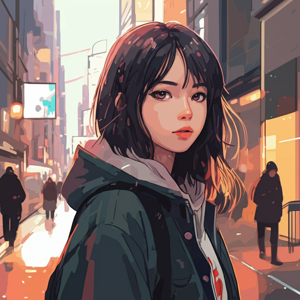

In [235]:
display_response(response, "girl.png")  # we also save the image here

Now you can quickly edit with more prompts:

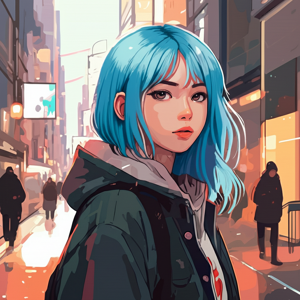

In [236]:
response = chat.send_message("change the hair color to blue")

display_response(response)

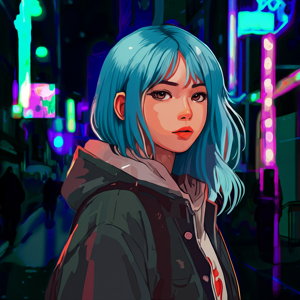

In [237]:
response = chat.send_message("make it at night and add neon lights")

display_response(response)

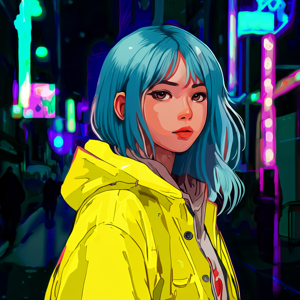

In [238]:
response = chat.send_message("change the jacket color to yellow")

display_response(response)

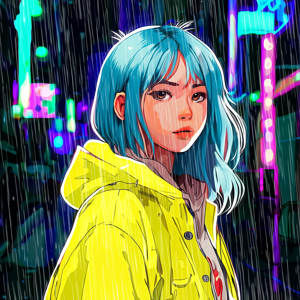

In [239]:
response = chat.send_message("add light rain")

display_response(response)

## 2. Use one-off model calls

Use `generate_content()` for isolated image creation or edits, where chat history is not required and precise prompt control is preferred.

(The [SDK chats class](https://github.com/googleapis/python-genai/blob/main/google/genai/chats.py) is a convenience module that uses `generate_content()` behind the scenes.)

In [249]:
# prompt_text_only = "Create a an image of a girl in tokyo, comic style"

prompt_with_image = [
    "make it add night, add bright neon lights",
    Image.open('girl.png')
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt_with_image,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

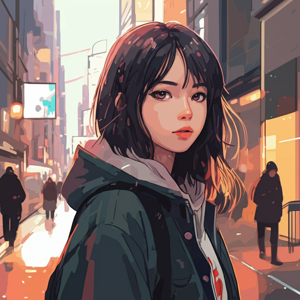

In [253]:
img = Image.open('girl.png')  # the original one we saved earlier
img.thumbnail((300, 300))
display(img)

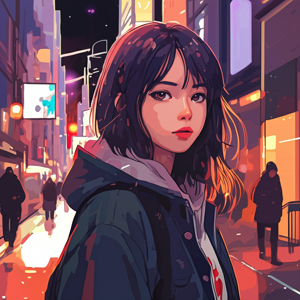

In [250]:
display_response(response)

## More resources

- [Docs](https://ai.google.dev/gemini-api/docs/image-generation)
- [Next.js starter demo](https://github.com/google-gemini/gemini-image-editing-nextjs-quickstart)
- [Google Gen AI Python SDK](https://github.com/googleapis/python-genai)